In [1]:
using QuantumBayesian
using PyPlot

# Deterministic Single Qubit Evolution Tests

**Justin Dressel**, 12/6/2016 <br />
*Institute for Quantum Studies, Chapman University*

Benchmark various integration algorithms for a single qubit damped Rabi oscillation, for comparison with the DifferentialEquations package tested in a separate notebook.

## Basic Definitions

### Qubit Hilbert space

In [2]:
q = qubit()

QuantumBayesian.QFactor: Qubit
Dims  : 2
Ops   : "d", "y", "x", "u", "z", "i"


### Global Constants

In [3]:
Ω  = 2*π;        # Rabi frequency
τ = 3.0;         # Measurement collapse timescale
Γ = 1/(2*τ);     # Measurement dephasing rate (quantum-limited efficiency)
T = (0.0, 6*τ);  # Time duration of simulation;

dt = 1e-2;       # Simulation timestep (coarse to show method precision);

### Common Trajectory and Plotting Code

In [4]:
# Initial conditions (matrix and superket)
init = ground(q)
sinit = sparse(superket(init))

# Bloch expectation values (matrix and superket)
fs  = collect(ρ -> real(expect(ρ, q(l)))    for l in ["x","y","z"])
sfs = collect(ρ -> real(ρ ⋅ superket(q(l))) for l in ["x","y","z"])

# Trajectory and plotting function
function solve(inc, init, dt, T, fs, plot_title)
    @time out = trajectory(inc, init, T, fs..., dt=dt)
    p = plot(out[1],out[2],label=L"$x$")
    hold(true)
    plot(out[1],out[3],label=L"$y$")
    plot(out[1],out[4],label=L"$z$")
    ax = gca()
    ax[:set_ylim]([-1.1,1.1])
    xlabel(L"$t (2\pi/\Omega)$")
    ylabel("Bloch coordinates")
    title(plot_title)
    legend()
    hold(false)
    show()
end;

## Time-independent Rabi Hamiltonian

In [5]:
# Hamiltonian
H = (Ω/2)*q("y");
# Measurement dephasing
DM = sqrt(Γ/2)*q("z");

### Coherent (Hamiltonian) Evolution

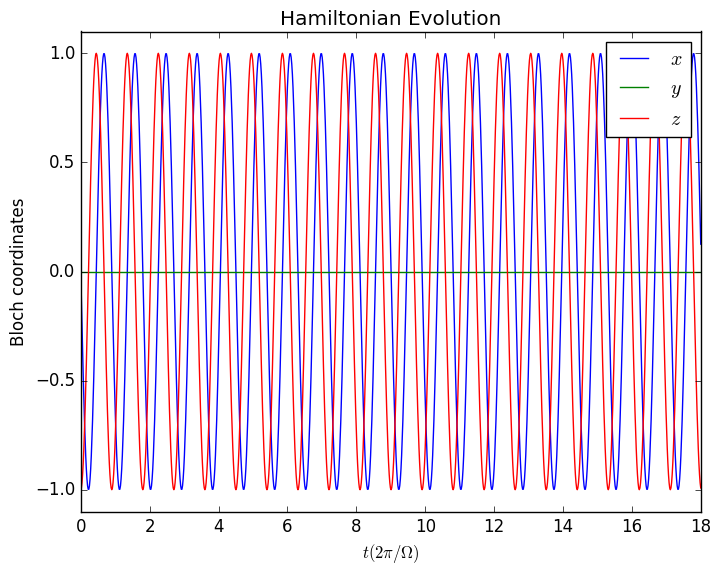

  0.536567 seconds (804.13 k allocations: 37.350 MB, 1.86% gc time)


INFO: Trajectory: steps = 1799, points = 1000, values = 3
INFO: Time elapsed: 0.029391301 s, Steps per second: 61208.58685364081


In [6]:
solve(ham(dt, H), init, dt, T, fs, "Hamiltonian Evolution")

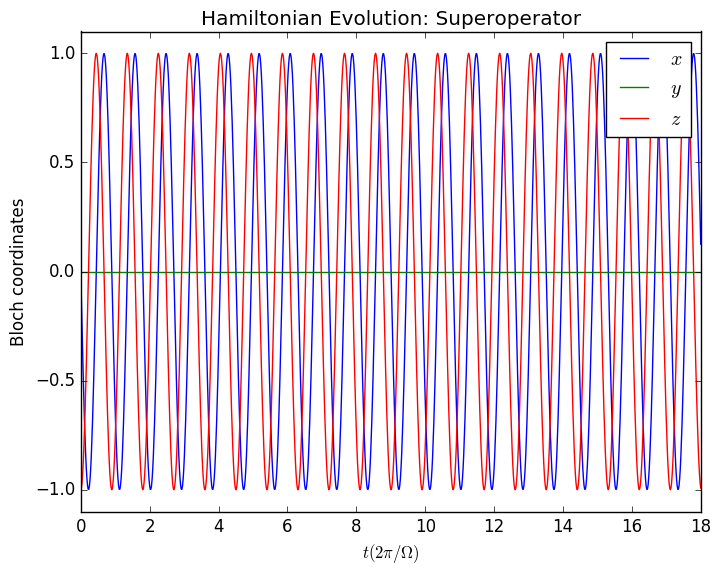

  1.294051 seconds (2.00 M allocations: 49.484 MB, 0.63% gc time)


INFO: Trajectory: steps = 1799, points = 1000, values = 3
INFO: Time elapsed: 0.061845414 s, Steps per second: 29088.65643619105


In [7]:
solve(sham(dt, H), sinit, dt, T, sfs, "Hamiltonian Evolution: Superoperator")

### Dissipative (Lindblad) Evolution

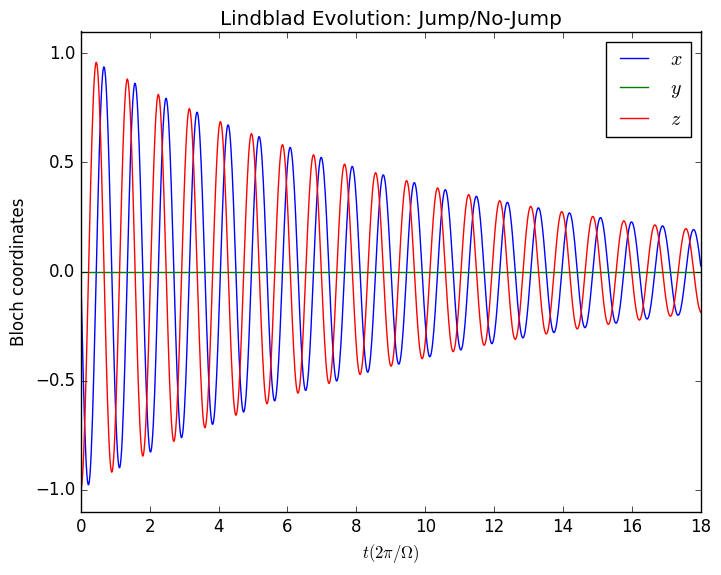

  0.118163 seconds (327.55 k allocations: 23.245 MB, 7.28% gc time)


INFO: Trajectory: steps = 1799, points = 1000, values = 3
INFO: Time elapsed: 0.089326068 s, Steps per second: 20139.697630035615


In [8]:
solve(lind(dt, H, DM), init, dt, T, fs, "Lindblad Evolution: Jump/No-Jump")

INFO: Trajectory: steps = 1799, points = 1000, values = 3
INFO: Time elapsed: 0.045566789 s, Steps per second: 39480.508490514876


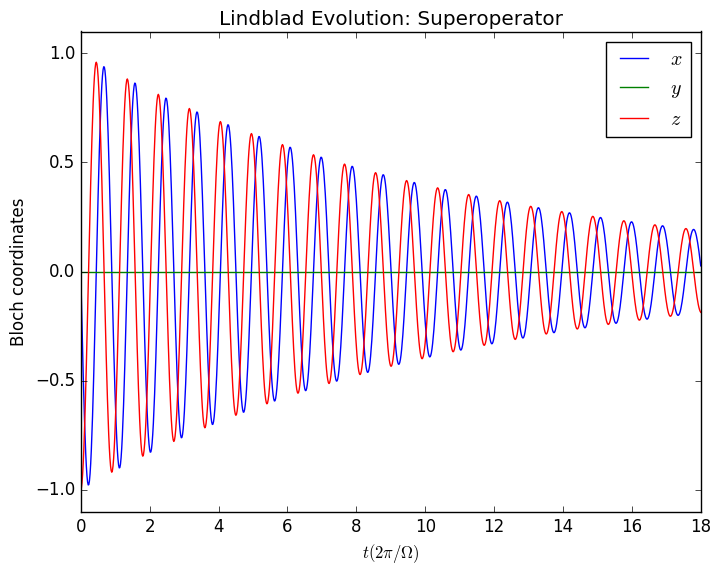

  0.074353 seconds (143.91 k allocations: 8.522 MB)


In [9]:
solve(slind(dt, H, DM), sinit, dt, T, sfs, "Lindblad Evolution: Superoperator")

INFO: Trajectory: steps = 1799, points = 1000, values = 3
INFO: Time elapsed: 0.56828486 s, Steps per second: 3165.6658950935275


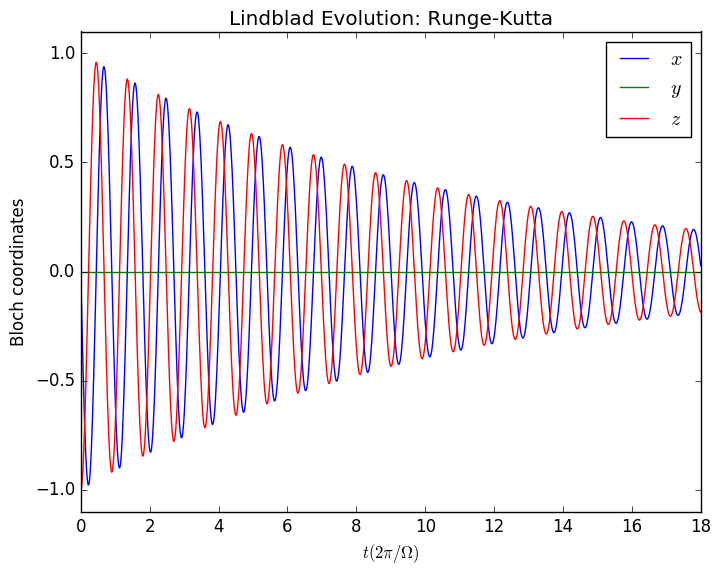

  0.619627 seconds (2.63 M allocations: 180.882 MB, 4.09% gc time)


In [10]:
solve(lind_rk4(dt, H, DM), init, dt, T, fs, "Lindblad Evolution: Runge-Kutta")

## Time-dependent Rabi Pulse

In [11]:
# Hamiltonian
f(t::Float64) = 2*exp(-(t-3*τ)^2/2)/sqrt(2π)
h(t::Float64) = f(t)*(Ω/2)*q("y");

### Coherent (Hamiltonian) Evolution

INFO: Trajectory: steps = 1799, points = 1000, values = 3
INFO: Time elapsed: 0.05678846 s, Steps per second: 31678.971396653476


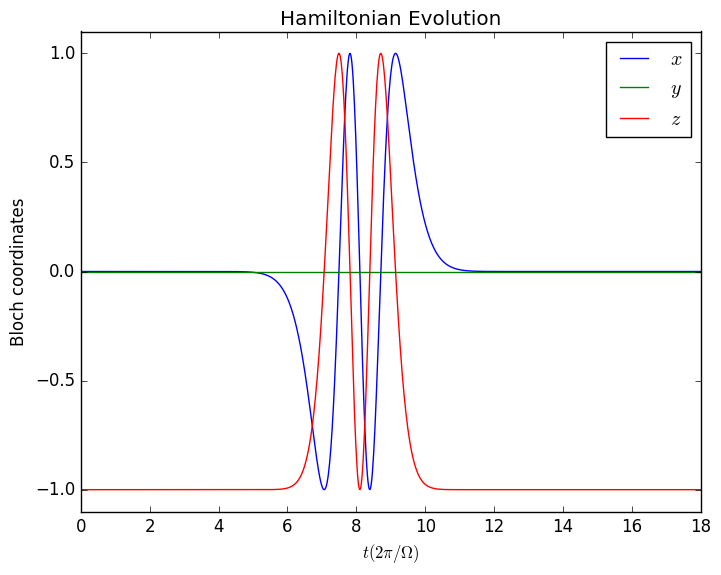

  0.113639 seconds (340.38 k allocations: 21.809 MB, 3.10% gc time)


In [12]:
solve(ham(dt, h), init, dt, T, fs, "Hamiltonian Evolution")

INFO: Trajectory: steps = 1799, points = 1000, values = 3
INFO: Time elapsed: 0.164378906 s, Steps per second: 10944.226627229165


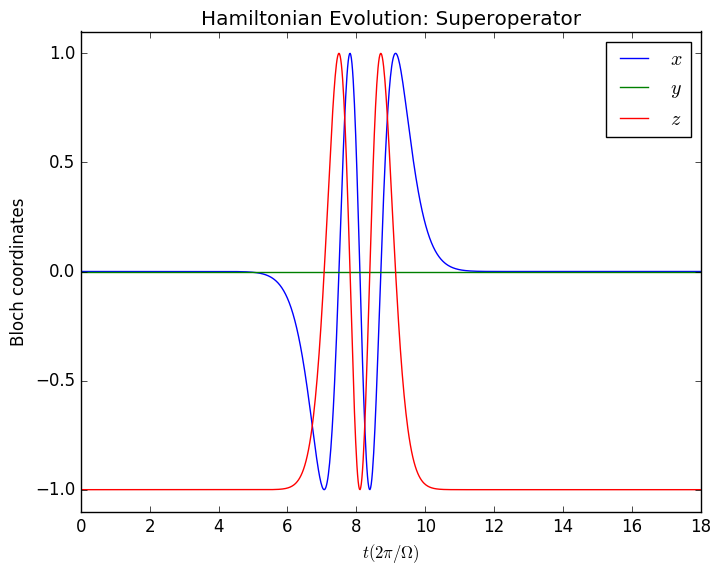

  0.215458 seconds (482.07 k allocations: 32.360 MB, 2.53% gc time)


In [13]:
solve(sham(dt, h), sinit, dt, T, sfs, "Hamiltonian Evolution: Superoperator")

### Dissipative (Lindblad) Evolution

INFO: Trajectory: steps = 1799, points = 1000, values = 3
INFO: Time elapsed: 0.079752772 s, Steps per second: 22557.209672912686


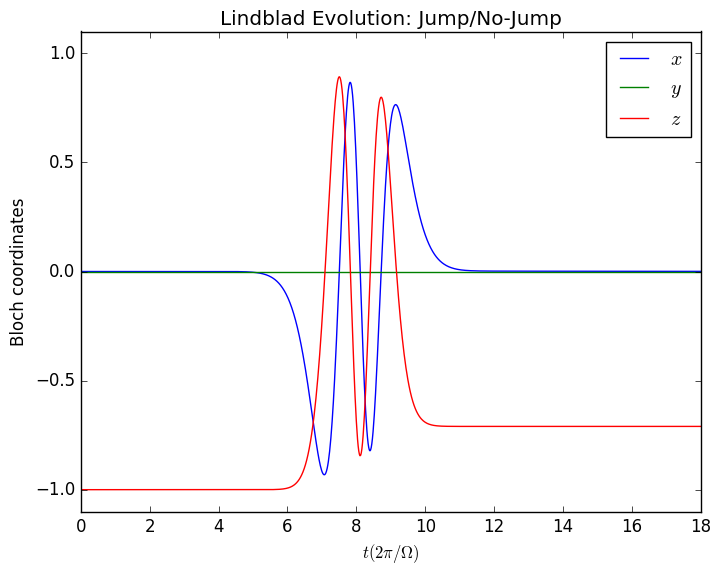

  0.115149 seconds (447.20 k allocations: 32.504 MB, 2.60% gc time)


In [14]:
solve(lind(dt, h, DM), init, dt, T, fs, "Lindblad Evolution: Jump/No-Jump")

INFO: Trajectory: steps = 1799, points = 1000, values = 3
INFO: Time elapsed: 0.306424969 s, Steps per second: 5870.931490573146


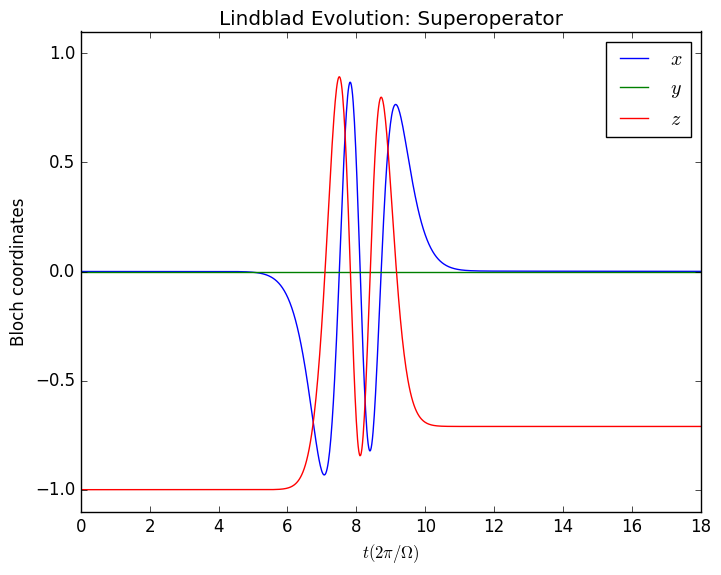

  0.344463 seconds (930.15 k allocations: 71.638 MB, 3.06% gc time)


In [15]:
solve(slind(dt, h, DM), sinit, dt, T, sfs, "Lindblad Evolution: Superoperator")

INFO: Trajectory: steps = 1799, points = 1000, values = 3
INFO: Time elapsed: 0.723815076 s, Steps per second: 2485.441461017593


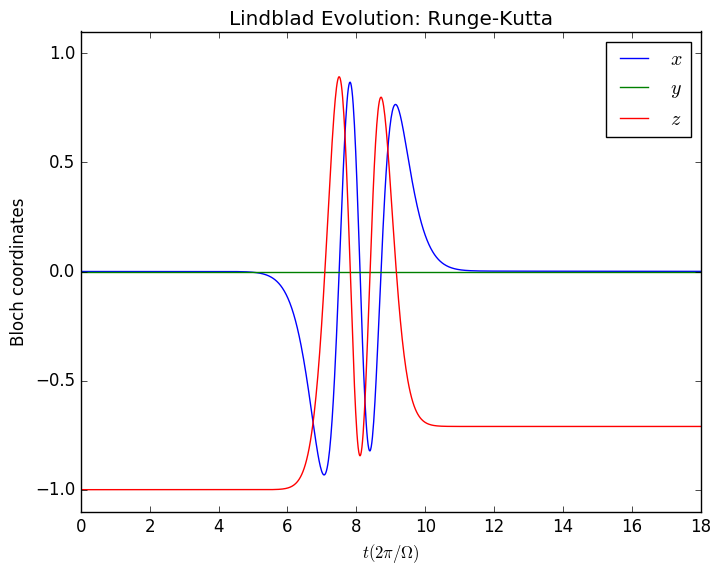

  0.865159 seconds (3.09 M allocations: 199.163 MB, 3.90% gc time)


In [16]:
solve(lind_rk4(dt, h, DM), init, dt, T, fs, "Lindblad Evolution: Runge-Kutta")

## Version Information

In [17]:
versioninfo()

Julia Version 0.5.0
Commit 3c9d753 (2016-09-19 18:14 UTC)
Platform Info:
  System: Linux (x86_64-pc-linux-gnu)
  CPU: Intel(R) Core(TM) i7-4790 CPU @ 3.60GHz
  WORD_SIZE: 64
  BLAS: libopenblas (DYNAMIC_ARCH NO_AFFINITY Haswell)
  LAPACK: libopenblas
  LIBM: libm
  LLVM: libLLVM-3.7.1 (ORCJIT, haswell)


In [18]:
Pkg.installed("PyPlot")

v"2.2.4"

In [19]:
Pkg.installed("QuantumBayesian")

v"0.0.0-"